# Project: Yelp Rating Regression Predictor

The restaurant industry is tougher than ever, with restaurant reviews blazing across the Internet from day one of a restaurant's opening. But as a lover of food, you and your friend decide to break into the industry and open up your own restaurant, Danielle's Delicious Delicacies. Since a restaurant's success is highly correlated with its reputation, you want to make sure Danielle's Delicious Delicacies has the best reviews on the most queried restaurant review site: Yelp! While you know your food will be delicious, you think there are other factors that play into a Yelp rating and will ultimately determine your business's success. With a dataset of different restaurant features and their Yelp ratings, you decide to use a Multiple Linear Regression model to investigate what factors most affect a restaurant's Yelp rating and predict the Yelp rating for your restaurant!

In this project we'll be working with a real dataset provided by Yelp. We have provided six files, listed below with a brief description:
* `yelp_business.json`: establishment data regarding location and attributes for all businesses in the dataset
* `yelp_review.json`: Yelp review metadata by business
* `yelp_user.json`: user profile metadata by business
* `yelp_checkin.json`: online checkin metadata by business
* `yelp_tip.json`: tip metadata by business
* `yelp_photo.json`: photo metadata by business

For a more detailed explanation of the features in each `.json` file, see the accompanying [explanatory feature document](https://docs.google.com/document/d/1V6FjJpKspVBOOBs4E7fBfp_yzHn0--XJkC2uUtWuRgM/edit).

Let's get started by exploring the data in each of these files to see what we are working with.

## Load the Data and Take a Peek

To get a better understanding of the dataset we can use Pandas to explore the data in DataFrame form. In the code block below we have imported Pandas for you. The `read_json()` method reads data from a json file into a DataFrame, as shown below:
```python
df = pd.read_json('file_name.json', lines=True)
```
Load the data from each of the json files with the following naming conventions:
* `yelp_business.json` into a DataFrame named `businesses`
* `yelp_review.json` into a DataFrame named `reviews`
* `yelp_user.json` into a DataFrame named `users`
* `yelp_checkin.json` into a DataFrame named `checkins`
* `yelp_tip.json` into a DataFrame named `tips`
* `yelp_photo.json` into a DataFrame named `photos`

Importing that data could take 10 to 20 seconds to run depending on your computer, but don't worry, once it's loaded in you're ready to go!

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
businesses = pd.read_json('yelp_business.json', lines=True)
reviews = pd.read_json('yelp_review.json', lines=True)
users = pd.read_json('yelp_user.json', lines=True)
checkins = pd.read_json('yelp_checkin.json', lines=True)
tips = pd.read_json('yelp_tip.json', lines=True)
photos = pd.read_json('yelp_photo.json', lines=True)

In order to more clearly see the information in our DataFrame, we can adjust the number of columns shown (`max_columns`) and the number of characters shown in a column (`max_colwidth`) with the below code:

```python
pd.options.display.max_columns = number_of_columns_to_display
pd.options.display.max_colwidth = number_of_characters_to_display
```

Set `max_columns` to `60` and `max_colwidth` to `500`. We are working with some BIG data here!

In [3]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

Inspect the first five rows of each DataFrame using the `.head()` method to get an overview of the data (make sure to check each DataFrame in a separate cell in order to view it properly).

In [5]:
businesses.head(3)

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0


In [6]:
reviews.head()

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [7]:
users.head()

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


In [8]:
checkins.head()

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23': 1, 'Thu-23': 1}",1,4


In [9]:
tips.head()

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


In [10]:
photos.head()

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


How many different businesses are in the dataset? What are the different features in the review DataFrame?

In [15]:
businesses.address.nunique()

148815

In [16]:
reviews.columns

Index(['business_id', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes'],
      dtype='object')

What is the range of values for the features in the user DataFrame?

In [22]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
average_number_friends,188593.0,105.132000,162.653680,1.000000,26.666667,59.384615,117.666667,4219.000000
average_days_on_yelp,188593.0,2005.367009,554.174540,76.000000,1647.000000,1957.150000,2312.238095,4860.000000
average_number_fans,188593.0,11.590148,25.901801,0.000000,0.666667,3.583333,11.555556,1174.666667
average_review_count,188593.0,122.110660,208.814471,0.666667,21.000000,62.142857,143.454545,6335.000000
average_number_years_elite,188593.0,0.923313,1.109289,0.000000,0.000000,0.583333,1.400000,10.666667


What is the Yelp rating, or `stars`, of the establishment with `business_id` = `5EvUIR4IzCWUOm0PsUZXjA`. Use Pandas boolean indexing to find the Yelp rating, using the syntax below:

```python
df[df['column_we_know'] == 'value_we_know']['column_we_want']
```

In [24]:
businesses[businesses.business_id=='5EvUIR4IzCWUOm0PsUZXjA'].stars

30781    3.0
Name: stars, dtype: float64

 What feature, or column, do the DataFrames have in common?

In [31]:
businesses.columns & reviews.columns & photos.columns \
&\
users.columns & tips.columns & checkins.columns

Index(['business_id'], dtype='object')

## Merge the Data

Since we are working with data from several files, we need to combine the data into a single DataFrame that allows us to analyze the different features with respect to our target variable, the Yelp rating. We can do this by merging the multiple DataFrames we have together, joining them on the columns they have in common. In our case, this unique identifying column is the `business_id`. We can merge two DataFrames together with the following syntax:

```python
pd.merge(left, right, how='inner/outer/left/right', on='column(s)_to_merge_on')
```
* `left` is the DataFrame on the left side of our merge
* `right` is the DataFrame on the right side of our merge
* `how` describes the style of merge we want to complete (similar to inner/outer/left/right joins in SQL)
* `on` is the column or columns to perform the merge on (the column connecting the two tables)

Given our six DataFrames, we will need to perform 5 merges to combine all the data into one DataFrame. In the cell below we merged the business table and the review table into a new DataFrame, `df`, for you. After the merge we've added all the rows from `businesses` and `reviews` together, but kept the same total number of rows! Run the cell to perform the merge and confirm the number of rows in `df`. 

In [38]:
del df

In [39]:
df = pd.merge(businesses, reviews, how='left', on='business_id')
print(len(df))
print(len(businesses))
print(len(reviews))

188593
188593
188593


Merge each of the other 4 DataFrames into our new DataFrame `df` to combine all the data together. Make sure that `df` is the left DataFrame in each merge and `how=left` since not every DataFrame includes every business in the dataset (this way we won't lose any data during the merges). Once combined, print out the columns of `df`. What features are in this new DataFrame?

In [40]:
print(len(df.columns))
print(len(users.columns))
df = pd.merge(df, users, how='left', on='business_id')
print(len(df))
print(len(df.columns))
print(len(users.columns))

28
6
188593
33
6


In [41]:
df = pd.merge(df, checkins, how='left', on='business_id')
df = pd.merge(df, photos, how='left', on='business_id')
df = pd.merge(df, tips, how='left', on='business_id')
df.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,time,weekday_checkins,weekend_checkins,average_caption_length,number_pics,average_tip_length,number_tips
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1,618.250000,532.916667,0.865342,6,5,13,42.833333,1809.375000,5.375000,114.875000,1.125000,"{'Fri-0': 1, 'Sun-0': 3, 'Thu-0': 1, 'Fri-1': 1, 'Fri-16': 1, 'Tue-17': 1, 'Sat-18': 1, 'Tue-18': 2, 'Wed-18': 1, 'Fri-19': 2, 'Thu-19': 2, 'Sat-20': 3, 'Thu-20': 1, 'Tue-20': 1, 'Sat-21': 2, 'Tue-21': 1, 'Fri-22': 1, 'Sat-22': 1, 'Thu-22': 1, 'Fri-23': 1, 'Sat-23': 1}",11.0,18.0,NaN,NaN,38.0,6.0
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1,371.666667,481.333333,0.975000,0,1,1,64.333333,970.333333,2.666667,19.666667,0.666667,{'Sun-1': 1},0.0,1.0,29.0,1.0,66.0,1.0
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0,1106.200000,252.000000,0.301240,0,2,1,4.200000,1499.600000,1.000000,24.600000,0.600000,"{'Mon-0': 1, 'Sun-0': 1, 'Fri-1': 1, 'Sun-1': 1, 'Sat-17': 1, 'Wed-20': 1, 'Sat-23': 1}",2.0,5.0,NaN,NaN,32.0,1.0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0,398.500000,672.625000,-0.060500,1,0,3,12.500000,1626.500000,2.3

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188593 entries, 0 to 188592
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   address                     188593 non-null  object 
 1   alcohol?                    188593 non-null  int64  
 2   attributes                  162807 non-null  object 
 3   business_id                 188593 non-null  object 
 4   categories                  188052 non-null  object 
 5   city                        188593 non-null  object 
 6   good_for_kids               188593 non-null  int64  
 7   has_bike_parking            188593 non-null  int64  
 8   has_wifi                    188593 non-null  int64  
 9   hours                       143791 non-null  object 
 10  is_open                     188593 non-null  int64  
 11  latitude                    188587 non-null  float64
 12  longitude                   188587 non-null  float64
 13  name          

## Clean the Data

We are getting really close to the fun analysis part! We just have to clean our data a bit so we can focus on the features that might have predictive power for determining an establishment's Yelp rating.

In a Linear Regression model, our features will ideally be continuous variables that have an affect on our dependent variable, the Yelp rating. For this project with will also be working with some features that are binary, on the scale [0,1]. With this information, we can remove any columns in the dataset that are not continuous or binary, and that we do not want to make predictions on. The cell below contains a list of these unnecessary features. Drop them from `df` with Pandas' drop syntax, provided below:

```python
df.drop(list_of_features_to_remove, axis=1, inplace=True)
```

* `list_of_features_to_remove` is, you guessed it, the list of features we want to remove!
* `axis=1` lets Pandas know we want to drop columns, not rows, from our DataFrame (axis=0 is used for computations along rows!) 
* `inplace=True` lets us drop the columns right here in our DataFrame, instead of returning a new DataFrame that we could store in a new variable

In [43]:
features_to_remove = ['address','attributes','business_id',
                      'categories','city','hours','is_open',
                      'latitude','longitude','name','neighborhood',
                      'postal_code','state','time']
df.drop(features_to_remove, axis=1, inplace=True)

Now we just have to check our data to make sure we don't have any missing values, or `NaN`s, which will prevent the Linear Regression model from running correctly. To do this we can use the statement `df.isna().any()`. This will check all of our columns and return `True` if there are any missing values or `NaN`s, or `False` if there are no missing values. Check if `df` is missing any values.

In [44]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins               True
weekend_checkins               True
average_caption_length         True
number_pics                    True
average_tip_length             True
number_tips                    True
dtype: bool

As you can see, there are a few columns with missing values. Since our dataset has no information recorded for some businesses in these columns, we will assume the Yelp pages did not display these features. For example, if there is a `NaN` value for `number_pics`, it means that the associated business did not have any pictures posted on its Yelp page. Thus we can replace all of our `NaN`s with `0`s. To do this we can use the `.fillna()` method, which takes a dictionary as shown below:

```python
df.fillna({'column_1':val_to_replace_na,
           'column_2':val_to_replace_na,
           'column_3':val_to_replace_na},
          inplace=True)
```

* `column_1`, `column_2`, and `column_3` are the columns with missing values that we want to fill. We can include as many columns as we like in the dictionary that is passed to `.fill_na()`
* `val_to_replace_na` is the value that will replace the missing values, or `NaN`s
* `inplace=True` since we want to perform our changes in place and not return a new DataFrame

Fill the missing values in `df` with `0`. Afterwards, confirm the missing values have been filled with `df.isna().any()`.

In [45]:
df.fillna(0, inplace=True)

In [46]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins              False
weekend_checkins              False
average_caption_length        False
number_pics                   False
average_tip_length            False
number_tips                   False
dtype: bool

## Exploratory Analysis

Now that our data is all together, let's investigate some of the different features to see what might correlate most with our dependent variable, the Yelp rating (called `stars` in our DataFrame). The features with the best correlations could prove to be the most helpful for our Linear Regression model! Pandas DataFrames have a really helpful method, `.corr()`, that allows us to see the correlation coefficients for each pair of our different features. Remember, a correlation of `0` indicates that two features have no linear relationship, a correlation coefficient of `1` indicates two features have a perfect positive linear relationship, and a correlation coefficient of `-1` indicates two features have a perfect negative linear relationship. Call `.corr()` on `df`. You'll see that `number_funny_votes` has a correlation coefficient of `0.001320` with respect to `stars`, our Yelp rating. This is a very weak correlation. What features best correlate, both positively and negatively, with Yelp rating?

In [49]:
df.corr()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_caption_length,number_pics,average_tip_length,number_tips
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.015261,0.129901,0.017794,0.026846,0.099141,0.094398,0.131175,0.305570,0.252523,0.098037,0.208856
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.016557,0.045057,0.024901,0.040692,0.094233,0.068960,0.079808,0.291413,0.175058,0.121948,0.156536
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.028307,-0.045849,0.018120,0.031203,0.083062,0.082474,0.093579,0.180468,0.109552,0.144163,0.147115
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.015937,0.000448,0.023913,0.044006,0.082863,0.107467,0.126861,0.258938,0.210583,0.104742,0.173542
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.087231,0.176133,0.104221,0.122982,0.210487,0.057877,0.081321,0.170171,0.143570,0.129212,0.119632
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.026206,0.050451,0.000474,-0.002576,0.014712,0.567452,0.699631,0.224983,0.610889,0.094133,0.844978
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419,0.004130,0.007863,0.000040,0.001727,-0.052899,0.014038
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,-0.025522,0.048850,0.001131,0.010618,0.063990,0.053162,0.076183,0.282823,0.231242,0.084098,0.134832
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.027924,0.078443,-0.007124,-0.005260,0.009551,0.047402,0.055898,0.103271,0.073276,0.119925,0.097700
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.032199,0.031577,0.028122,0.218990,0.820888,0.243377,0.261623,0.377335,0.030324,0.035531,-0.024121,-0.041140,-0.000525,0.050846


To further visualize these relationships, we can plot certain features against our dependent variable, the Yelp rating. In the cell below we have provided the code to import Matplotlib. We can use Matplotlib's `.scatter()` method with the below syntax to plot what these correlations look like:

```python
plt.scatter(x_values_to_plot, y_values_to_plot, alpha=blending_val)
```

* `x_values_to_plot` are the values to be plotted along the x-axis
* `y_values_to_plot` are the values to be plotted along the y-axis
* `alpha=blending_val` is the blending value, or how transparent (0) or opaque (1) a plotted point is. This will help us distinguish areas of the plot with high point densities and low point densities

Plot the three features that correlate most with Yelp rating (`average_review_sentiment`, `average_review_length`, `average_review_age`) against `stars`, our Yelp rating. Then plot a lowly correlating feature, such as `number_funny_votes`, against `stars`.

>What is `average_review_sentiment`, you ask? `average_review_sentiment` is the average sentiment score for all reviews on a business' Yelp page. The sentiment score for a review was calculated using the sentiment analysis tool [VADER](https://github.com/cjhutto/vaderSentiment). VADER uses a labeled set of positive and negative words, along with codified rules of grammar, to estimate how positive or negative a statement is. Scores range from `-1`, most negative, to `+1`, most positive, with a score of `0` indicating a neutral statement. While not perfect, VADER does a good job at guessing the sentiment of text data!

What kind of relationships do you see from the plots? Do you think these variables are good or bad features for our Yelp rating prediction model?

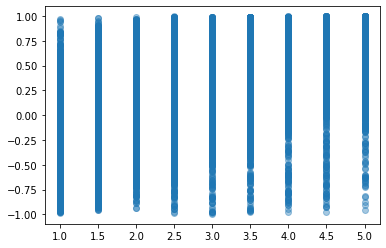

In [52]:
# plot average_review_sentiment against stars here
plt.scatter(df.stars, df.average_review_sentiment, alpha=0.4)

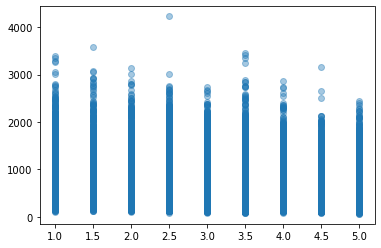

In [53]:
# plot average_review_length against stars here
plt.scatter(df.stars, df.average_review_length, alpha=0.4)

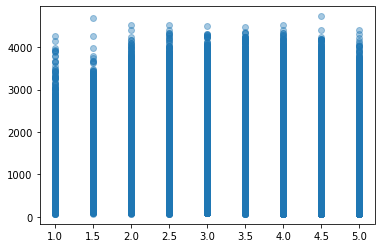

In [57]:
# plot average_review_age against stars here
plt.scatter(df.stars, df.average_review_age, alpha=0.4)

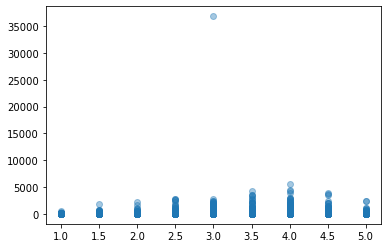

In [55]:
# plot number_funny_votes against stars here
plt.scatter(df.stars, df.number_funny_votes, alpha=0.4)

Why do you think `average_review_sentiment` correlates so well with Yelp rating?

## Data Selection

In order to put our data into a Linear Regression model, we need to separate out our features to model on and the Yelp ratings. From our correlation analysis we saw that the three features with the strongest correlations to Yelp rating are `average_review_sentiment`, `average_review_length`, and `average_review_age`. Since we want to dig a little deeper than `average_review_sentiment`, which understandably has a very high correlation with Yelp rating, let's choose to create our first model with `average_review_length` and `average_review_age` as features.

Pandas lets us select one column of a DataFrame with the following syntax:

```python
subset_of_data = df['feature_to_select']
```
Pandas also lets us select multiple columns from a DataFrame with this syntax:

```python
subset_of_data = df[list_of_features_to_select]
```
Create a new DataFrame `features` that contains the columns we want to model on: `average_review_length` and `average_review_age`. Then create another DataFrame `ratings` that stores the value we want to predict, Yelp rating, or `stars` in `df`.

In [58]:
features = df[['average_review_length', 'average_review_age']]
ratings = df['stars']

## Split the Data into Training and Testing Sets

We are just about ready to model! But first, we need to break our data into a training set and a test set so we can evaluate how well our model performs. We'll use scikit-learn's `train_test_split` function to do this split, which is provided in the cell below. This function takes two required parameters: the data, or our features, followed by our dependent variable, in our case the Yelp rating. Set the optional parameter `test_size` to be `0.2`. Finally, set the optional parameter `random_state` to `1`. This will make it so your data is split in the same way as the data in our solution code. 

Remember, this function returns 4 items in this order:
1. The training data (features), which we can assign to `X_train`
2. The testing data (features), which we can assign to `X_test`
3. The training dependent variable (Yelp rating), which we can assign to `y_train`
4. The testing dependent variable (Yelp rating), which we can assign to `y_test`

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, ratings,
                                                    test_size=0.2, train_size=0.8, random_state=1)

## Create and Train the Model

Now that our data is split into training and testing sets, we can finally model! In the cell below we have provided the code to import `LinearRegression` from scikit-learn's `linear_model` module. Create a new `LinearRegression` object named model. The `.fit()` method will fit our Linear Regression model to our training data and calculate the coefficients for our features. Call the `.fit()` method on `model` with `X_train` and `y_train` as parameters. Just like that our model has now been trained on our training data!

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluate and Understand the Model

Now we can evaluate our model in a variety of ways. The first way will be by using the `.score()` method, which provides the R^2 value for our model. Remember, R^2 is the coefficient of determination, or a measure of how much of the variance in our dependent variable, the predicted Yelp rating, is explained by our independent variables, our feature data. R^2 values range from `0` to `1`, with `0` indicating that the created model does not fit our data at all, and with `1` indicating the model perfectly fits our feature data. Call `.score()` on our model with `X_train` and `y_train` as parameters to calculate our training R^2 score. Then call `.score()` again on model with `X_test` and `y_test` as parameters to calculate R^2 for our testing data. What do these R^2 values say about our model? Do you think these features alone are able to effectively predict Yelp ratings?

In [62]:
model.score(X_train, y_train)

0.08250309566544889

In [63]:
model.score(X_test, y_test)

0.08083081210060561

After all that hard work, we can finally take a look at the coefficients on our different features! The model has an attribute `.coef_` which is an array of the feature coefficients determined by fitting our model to the training data. To make it easier for you to see which feature corresponds to which coefficient, we have provided some code in the cell that `zip`s together a list of our features with the coefficients and sorts them in descending order from most predictive to least predictive.

In [64]:
sorted(list(zip(['average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('average_review_length', -0.0009977176852074563),
 ('average_review_age', -0.00011621626836366434)]

Lastly we can calculate the predicted Yelp ratings for our testing data and compare them to their actual Yelp ratings! Our model has a `.predict()` method which uses the model's coefficients to calculate the predicted Yelp rating. Call `.predict()` on `X_test` and assign the values to `y_predicted`. Use Matplotlib to plot `y_test` vs `y_predicted`. For a perfect linear regression model we would expect to see the data plotted along the line `y = x`, indicating homoscedasticity. Is this the case? If not, why not? Would you call this model heteroscedastic or homoscedastic?

In [65]:
y_predicted = model.predict(X_test)

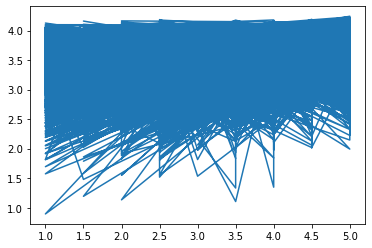

In [67]:
plt.plot(y_test, y_predicted)

## Define Different Subsets of Data

After evaluating the first model, you can see that `average_review_length` and `average_review_age` alone are not the best predictors for Yelp rating. Let's go do some more modeling with different subsets of features and see if we can achieve a more accurate model! In the cells below we have provided different lists of subsets of features that we will model with and evaluate. What other subsets of features would you want to test? Why do you think those feature sets are more predictive of Yelp rating than others? Create at least one more subset of features that you want to predict Yelp ratings from.

In [87]:
# subset of only average review sentiment
sentiment = ['average_review_sentiment']

In [90]:
# subset of all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking',
                   'takes_credit_cards','good_for_kids','take_reservations','has_wifi']

In [91]:
# subset of all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range',
                     'average_caption_length','number_pics',
                     'average_review_age','average_review_length',
                     'average_review_sentiment','number_funny_votes',
                     'number_cool_votes','number_useful_votes',
                     'average_tip_length','number_tips',
                     'average_number_friends','average_days_on_yelp',
                     'average_number_fans','average_review_count',
                     'average_number_years_elite','weekday_checkins','weekend_checkins']

In [92]:
# all features
all_features = binary_features + numeric_features

In [ ]:
# add your own feature subset here
feature_subset = 

## Further Modeling

Now that we have lists of different feature subsets, we can create new models from them. In order to more easily compare the performance of these new models, we have created a function for you below called `model_these_features()`. This function replicates the model building process you just completed with our first model! Take some time to review how the function works, analyzing it line by line. Fill in the empty comments with an explanation of the task the code beneath it is performing.

In [88]:
import numpy as np

# take a list of features to model as a parameter
def model_these_features(feature_list):
    
    # 
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]
    
    # 
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2,
                                                        random_state = 1)
    
    # don't worry too much about these lines, just know that they allow the model to work when
    # we model on just one feature instead of multiple features. Trust us on this one :)
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    # 
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    # 
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    # print the model features and their corresponding coefficients,
    # from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    # 
    y_predicted = model.predict(X_test)
    
    # 
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

Once you feel comfortable with the steps of the function, run models on the following subsets of data using `model_these_features()`:
* `sentiment`: only `average_review_sentiment`
* `binary_features`: all features that have a response range [0,1]
* `numeric_features`: all features that vary on a greater range than [0,1]
* `all_features`: all features
* `feature_subset`: your own feature subset

How does changing the feature sets affect the model's R^2 value? Which features are most important to predicting Yelp rating in the different models? Which models appear more or less homoscedastic?

Train Score: 0.6118980950438655
Test Score: 0.6114021046919491
[('average_review_sentiment', 2.303390843374988)]


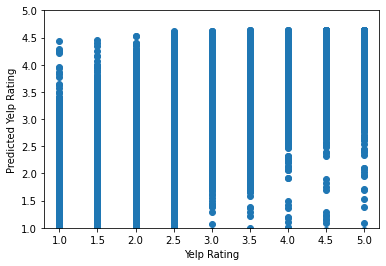

In [89]:
# create a model on sentiment here
model_these_features(sentiment)

Train Score: 0.012223180709591386
Test Score: 0.010119542202268739
[('has_bike_parking', 0.19003008208047414), ('alcohol?', -0.1454967070813194), ('has_wifi', -0.13187397577759247), ('good_for_kids', -0.08632485990339629), ('takes_credit_cards', 0.07175536492195116), ('take_reservations', 0.04526558530451656)]


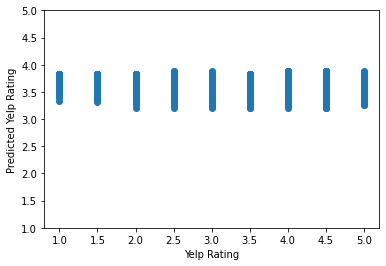

In [93]:
# create a model on all binary features here
model_these_features(binary_features)

Train Score: 0.6734992593766659
Test Score: 0.6713318798120143
[('average_review_sentiment', 2.272107664209628), ('price_range', -0.08046080962701695), ('average_number_years_elite', -0.07190366288054188), ('average_caption_length', -0.0033470660077858055), ('number_pics', -0.002956502812897175), ('number_tips', -0.001595305078903779), ('number_cool_votes', 0.0011468839227085428), ('average_number_fans', 0.0010510602097440632), ('average_review_length', -0.0005813655692094664), ('average_tip_length', -0.000532203206346085), ('number_useful_votes', -0.00023203784758731028), ('average_review_count', -0.00022431702895059404), ('average_review_age', -0.0001693060816507462), ('average_days_on_yelp', 0.00012878025876703232), ('weekday_checkins', 5.918580754471492e-05), ('weekend_checkins', -5.518176206983222e-05), ('average_number_friends', 4.82699211159939e-05), ('review_count', -3.483483763727934e-05), ('number_funny_votes', -7.88439567394987e-06)]


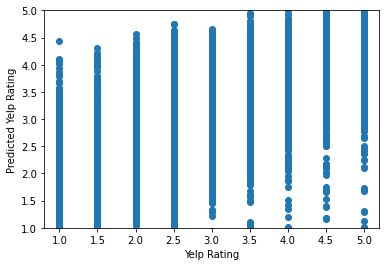

In [94]:
# create a model on all numeric features here
model_these_features(numeric_features)

Train Score: 0.6807828861895334
Test Score: 0.6782129045869243
[('average_review_sentiment', 2.280845699662422), ('alcohol?', -0.14991498593462138), ('has_wifi', -0.12155382629258796), ('good_for_kids', -0.11807814422014297), ('price_range', -0.06486730150042627), ('average_number_years_elite', -0.06278939713895455), ('has_bike_parking', 0.027296969912311748), ('takes_credit_cards', 0.02445183785366451), ('take_reservations', 0.01413455917298124), ('number_pics', -0.0013133612300805335), ('average_number_fans', 0.0010267986822655923), ('number_cool_votes', 0.0009723722734413863), ('number_tips', -0.0008546563320879573), ('average_caption_length', -0.0006472749798192976), ('average_review_length', -0.0005896257920272241), ('average_tip_length', -0.00042052175034053827), ('number_useful_votes', -0.0002715064125617837), ('average_review_count', -0.00023398356902507478), ('average_review_age', -0.00015776544111326118), ('average_days_on_yelp', 0.00012326147662884875), ('review_count', 0.00

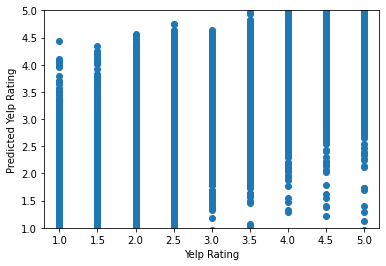

In [95]:
# create a model on all features here
model_these_features(all_features)

In [ ]:
# create a model on your feature subset here


## Danielle's Delicious Delicacies' Debut

You've loaded the data, cleaned it, modeled it, and evaluated it. You're tired, but glowing with pride after all the hard work. You close your eyes and can clearly see opening day of Danielle's Delicious Delicacies with a line out the door. But what will your Yelp rating be? Let's use our model to make a prediction.

Our best model was the model using all features, so we'll work with this model again. In the cell below print `all_features` to get a reminder of what features we are working with.

In [96]:
print(all_features)

['alcohol?', 'has_bike_parking', 'takes_credit_cards', 'good_for_kids', 'take_reservations', 'has_wifi', 'review_count', 'price_range', 'average_caption_length', 'number_pics', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes', 'average_tip_length', 'number_tips', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins']


Run the cell below to grab all the features and retrain our model on them.

In [97]:
features = df.loc[:,all_features]
ratings = df.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2,
                                                    random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

To give you some perspective on the restaurants already out there, we have provided the mean, minimum, and maximum values for each feature below. Will Danielle's Delicious Delicacies be just another average restaurant, or will it be a 5 star behemoth amongst the masses?

In [98]:
pd.DataFrame(list(zip(features.columns,features.describe()
                      .loc['mean'],features.describe()
                      .loc['min'],features.describe()
                      .loc['max'])),columns=['Feature','Mean','Min','Max'])

,Feature,Mean,Min,Max
0,alcohol?,0.140610,0.000000,1.000000
1,has_bike_parking,0.350692,0.000000,1.000000
2,takes_credit_cards,0.700243,0.000000,1.000000
3,good_for_kids,0.279029,0.000000,1.000000
4,take_reservations,0.106086,0.000000,1.000000
5,has_wifi,0.134968,0.000000,1.000000
6,review_count,31.797310,3.000000,7968.000000
7,price_range,1.035855,0.000000,4.000000
8,average_caption_length,2.831829,0.000000,140.000000
9,number_pics,1.489939,0.000000,1150.000000


Based on your plans for the restaurant, how you expect your customers to post on your Yelp page, and the values above, fill in the blanks in the NumPy array below with your desired values. The first blank corresponds with the feature at `index=0` in the DataFrame above, `alcohol?`, and the last blank corresponds to the feature at ``index=24``, `weekend_checkins`. Make sure to enter either `0` or `1` for all binary features, and if you aren't sure of what value to put for a feature, select the mean from the DataFrame above. After you enter the values, run the prediction cell below to receive your Yelp rating! How is Danielle's Delicious Delicacies debut going to be?

In [119]:
danielles_delicious_delicacies = np.array([1,1,1,1,1,1,50,2,3,1,1200,600,1
                                           ,15,18,43,45,6,105,2000,11,250,1,45,50]).reshape(1,-1)

In [120]:
model.predict(danielles_delicious_delicacies)

array([4.2613336])

## Next Steps

You have successfully built a linear regression model that predicts a restaurant's Yelp rating! As you have seen, it can be pretty hard to predict a rating like this even when we have a plethora of data. What other questions come to your mind when you see the data we have? What insights do you think could come from a different kind of analysis? Here are some ideas to ponder:

* Can we predict the cuisine of a restaurant based on the users that review it?
* What restaurants are similar to each other in ways besides cuisine?
* Are there different restaurant vibes, and what kind of restaurants fit these conceptions?
* How does social media status affect a restaurant's credibility and visibility?

As you progress further into the field of data science, you will be able to create models that address these questions and many more! But in the meantime, get back to working on that burgeoning restaurant business plan.